In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import json

In [3]:
rowcounter = 0
no = 0
no2 = 11
info = dict()
RTX007_info = np.zeros((10,5))
RTX015_info = np.zeros((10,5))
r7counter = 0
r15counter = 0
column_names = []
with open('RD_Info.csv', 'rt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    r7 = False
    r15 = False
    for row in spamreader:
        print(', '.join(row))
        if rowcounter == no:
            column_names.append([col_name for col_name in row])
            r7 = True
        elif rowcounter == no2:
            r7 = False
            r15 = True
        else:
            if r7:
                RTX007_info[r7counter,:] = np.asarray([float(r) for r in row])
                r7counter += 1
            if r15:
                RTX015_info[r15counter,:] = np.asarray([float(r) for r in row])
                r15counter += 1
        rowcounter += 1
column_names = column_names[0]

No. Of Rates, QP, bits, bpp, Psnr
1, 10, 61783568, 2.143, 52.9822
2, 15, 35330376, 1.226, 48.9672
3, 20, 19357592, 0.671, 45.6669
4, 25, 10641968, 0.369, 42.8278
5, 30, 5874824, 0.204, 40.187
6, 35, 3377296, 0.117, 37.7838
7, 40, 1949712, 0.068, 35.1741
8, 42, 1555024, 0.054, 34.0756
9, 45, 1063520, 0.037, 32.4544
10, 48, 672864, 0.023, 30.8734
No. Of Rates, QP, bits, bpp, Psnr
1, 10, 60325752, 2.093, 52.9358
2, 15, 34145408, 1.184, 49.0805
3, 20, 19401120, 0.673, 46.0125
4, 25, 11405600, 0.396, 43.2192
5, 30, 6639896, 0.23, 40.3377
6, 35, 3723112, 0.129, 37.4233
7, 40, 2048112, 0.071, 34.5131
8, 42, 1593440, 0.055, 33.3587
9, 45, 1035720, 0.036, 31.6229
10, 48, 632184, 0.022, 30.0215


In [18]:
column_names

['No. Of Rates', 'QP', 'bits', 'bpp', 'Psnr']

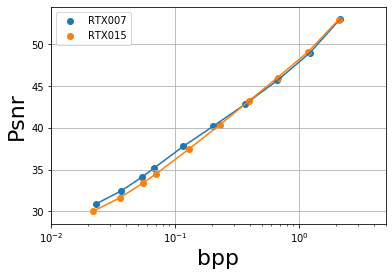

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(RTX007_info[:,3], RTX007_info[:,4])
ax.scatter(RTX007_info[:,3], RTX007_info[:,4], label='RTX007')
ax.plot(RTX015_info[:,3], RTX015_info[:,4])
ax.scatter(RTX015_info[:,3], RTX015_info[:,4], label='RTX015')
ax.set_xscale('log')
plt.grid()
plt.xlabel(column_names[3], fontsize='22')
plt.ylabel(column_names[4], fontsize='22')
plt.xlim([10e-3, 5])
plt.legend()

In [4]:
# read the jsons
json_file = 'psnr_ssim007.json'
with open(json_file) as f:
    results = json.load(f)
    psnr_ml_imgs_007 = np.asarray(results['ml_img'])
    psnr_ml_disps_007 = np.asarray(results['ml_disp'])
    psnr_r_imgs_007 = np.asarray(results['rnd_img'])
    psnr_r_disps_007 = np.asarray(results['rnd_disp'])
json_file = 'psnr_ssim015.json'
with open(json_file) as f:
    results = json.load(f)
    psnr_ml_imgs_015 = np.asarray(results['ml_img'])
    psnr_ml_disps_015 = np.asarray(results['ml_disp'])
    psnr_r_imgs_015 = np.asarray(results['rnd_img'])
    psnr_r_disps_015 = np.asarray(results['rnd_disp'])
print(psnr_ml_disps_015.shape)

(10, 2)


Text(0.5, 1.0, 'PSNR')

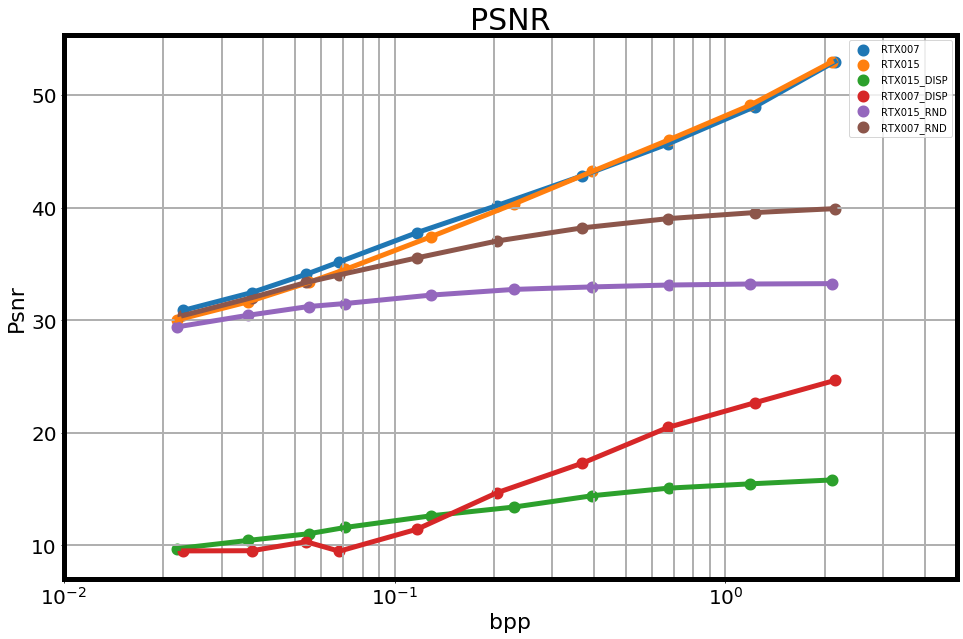

In [90]:
lines_width = 5
axis_width = 5
markes_width = 6
grid_width = 2

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
plt.grid(which='both',linewidth=grid_width)
ax.plot(RTX007_info[:,3], RTX007_info[:,4], linewidth=lines_width)
ax.scatter(RTX007_info[:,3], RTX007_info[:,4], label='RTX007', linewidth=markes_width)
ax.plot(RTX015_info[:,3], RTX015_info[:,4], linewidth=lines_width)
ax.scatter(RTX015_info[:,3], RTX015_info[:,4], label='RTX015', linewidth=markes_width)
ax.plot(RTX015_info[:,3], psnr_ml_disps_015[:,1], linewidth=lines_width)
ax.scatter(RTX015_info[:,3], psnr_ml_disps_015[:,1], label='RTX015_DISP', linewidth=markes_width)
ax.plot(RTX007_info[:,3], psnr_ml_disps_007[:,1], linewidth=lines_width)
ax.scatter(RTX007_info[:,3], psnr_ml_disps_007[:,1], label='RTX007_DISP', linewidth=markes_width)
ax.plot(RTX015_info[:,3], psnr_r_imgs_015[:], linewidth=lines_width)
ax.scatter(RTX015_info[:,3], psnr_r_imgs_015[:], label='RTX015_RND', linewidth=markes_width)
ax.plot(RTX007_info[:,3], psnr_r_imgs_007[:], linewidth=lines_width)
ax.scatter(RTX007_info[:,3], psnr_r_imgs_007[:], label='RTX007_RND', linewidth=markes_width)
ax.set_xscale('log')
plt.xlabel(column_names[3], fontsize='22')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.ylabel(column_names[4], fontsize='22')
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(axis_width)
plt.xlim([10e-3, 5])
plt.legend()
plt.title('PSNR', fontsize='30')

In [6]:
avg_psnr_raw = (RTX007_info[:,4]  + RTX015_info[:,4]) / 2
avg_psnr_ml = (psnr_ml_imgs_007[:,1]  + psnr_ml_imgs_007[:,1]) / 2
avg_psnr_disp = (psnr_ml_disps_007[:,1] + psnr_ml_disps_015[:,1] ) / 2
avg_psnr_rnd = (psnr_r_imgs_007[:] + psnr_r_imgs_015[:]) / 2
avg_psnr_rnd_disp = (psnr_r_disps_007[:] + psnr_r_disps_015[:]) / 2
bpp = (RTX007_info[:,3] + RTX015_info[:,3] ) / 2

Text(0.5, 1.0, 'PSNR - Disparity and Rendering')

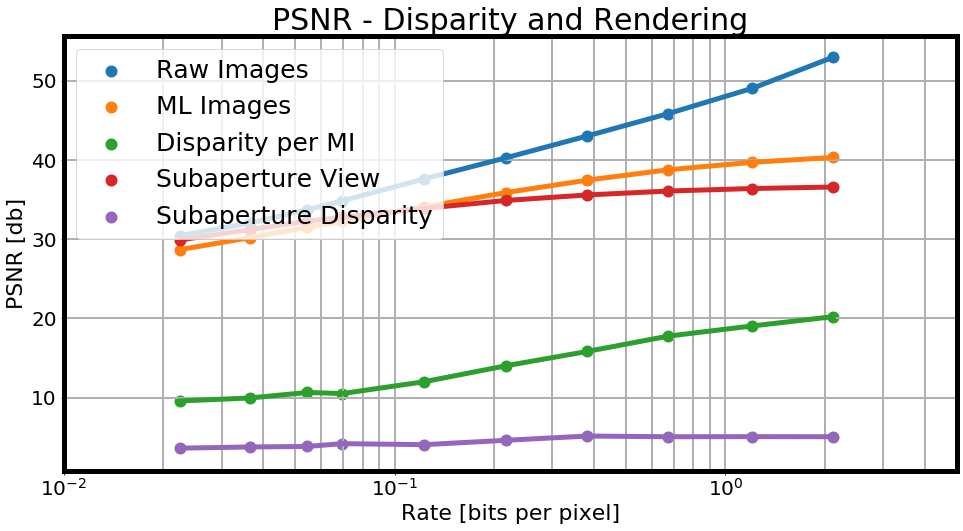

In [110]:
lines_width = 5
axis_width = 5
markes_width = 6
grid_width = 2

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
plt.grid(which='both',linewidth=grid_width)
ax.plot(bpp, avg_psnr_raw, linewidth=lines_width)
ax.scatter(bpp, avg_psnr_raw, label='Raw Images', linewidth=markes_width)
ax.plot(bpp, avg_psnr_ml, linewidth=lines_width)
ax.scatter(bpp, avg_psnr_ml, label='ML Images', linewidth=markes_width)
ax.plot(bpp, avg_psnr_disp, linewidth=lines_width)
ax.scatter(bpp, avg_psnr_disp, label='Disparity per MI', linewidth=markes_width)
ax.plot(bpp, avg_psnr_rnd, linewidth=lines_width)
ax.scatter(bpp, avg_psnr_rnd, label='Subaperture View', linewidth=markes_width)
ax.plot(bpp, avg_psnr_rnd_disp, linewidth=lines_width)
ax.scatter(bpp, avg_psnr_rnd_disp, label='Subaperture Disparity', linewidth=markes_width)
ax.set_xscale('log')
plt.xlabel('Rate [bits per pixel]', fontsize='22')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.ylabel('PSNR [db]', fontsize='22')
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(axis_width)
plt.xlim([10e-3, 5])
plt.legend(fontsize='25', loc='upper left')
plt.title('PSNR - Disparity and Rendering', fontsize='30')

Text(0.5, 1.0, 'PSNR - Subaperture View')

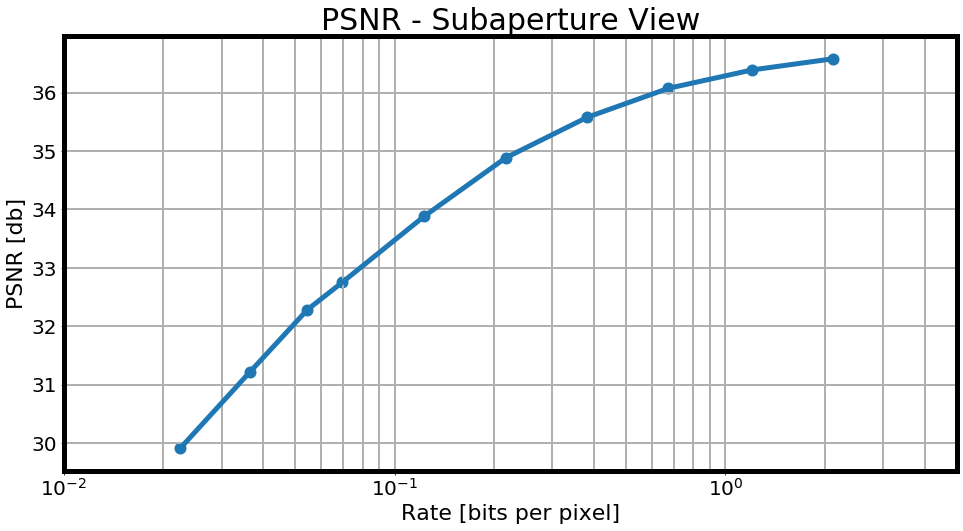

In [10]:
lines_width = 5
axis_width = 5
markes_width = 6
grid_width = 2

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
plt.grid(which='both',linewidth=grid_width)
ax.plot(bpp, avg_psnr_rnd, linewidth=lines_width)
ax.scatter(bpp, avg_psnr_rnd, label='Subaperture View', linewidth=markes_width)
#ax.plot(bpp, avg_psnr_rnd_disp, linewidth=lines_width)
#ax.scatter(bpp, avg_psnr_rnd_disp, label='Subaperture Disparity', linewidth=markes_width)
ax.set_xscale('log')
plt.xlabel('Rate [bits per pixel]', fontsize='22')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.ylabel('PSNR [db]', fontsize='22')
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(axis_width)
plt.xlim([10e-3, 5])
#plt.legend(fontsize='25', loc='upper left')
plt.title('PSNR - Subaperture View', fontsize='30')

Text(0.5, 1.0, 'PSNR - Subaperture Disparity')

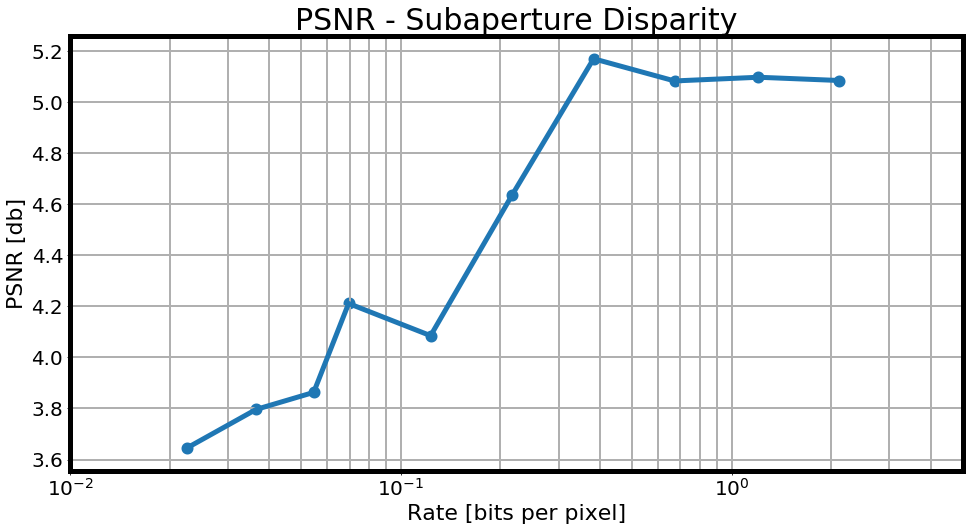

In [15]:
lines_width = 5
axis_width = 5
markes_width = 6
grid_width = 2

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
plt.grid(which='both',linewidth=grid_width)
#ax.plot(bpp, avg_psnr_rnd, linewidth=lines_width)
#ax.scatter(bpp, avg_psnr_rnd, label='Subaperture View', linewidth=markes_width)
ax.plot(bpp, avg_psnr_rnd_disp, linewidth=lines_width)
ax.scatter(bpp, avg_psnr_rnd_disp, label='Subaperture Disparity', linewidth=markes_width)
ax.set_xscale('log')
plt.xlabel('Rate [bits per pixel]', fontsize='22')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.ylabel('PSNR [db]', fontsize='22')
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(axis_width)
plt.xlim([10e-3, 5])
#plt.legend(fontsize='25', loc='upper left')
plt.title('PSNR - Subaperture Disparity', fontsize='30')

Text(0.5, 1.0, 'PSNR - Per Lens Disparity')

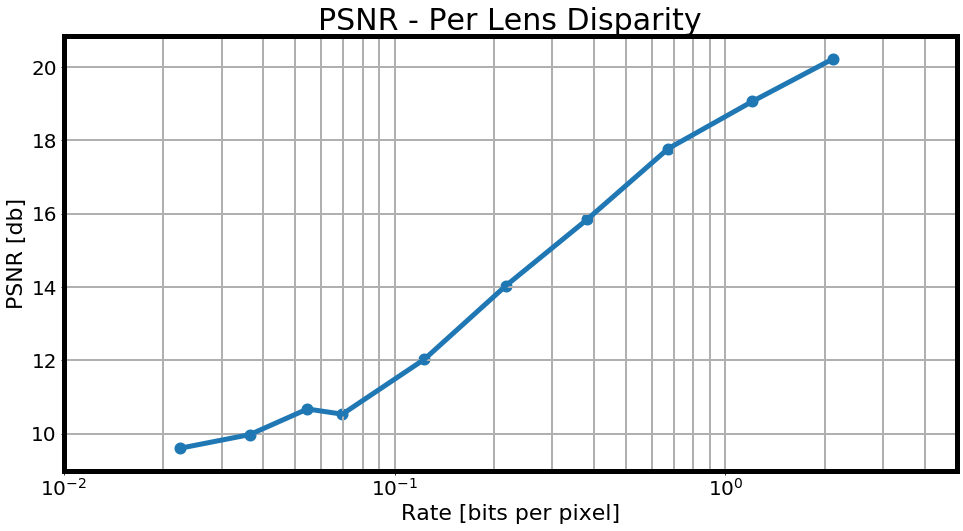

In [13]:
lines_width = 5
axis_width = 5
markes_width = 6
grid_width = 2

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
plt.grid(which='both',linewidth=grid_width)
ax.plot(bpp, avg_psnr_disp, linewidth=lines_width)
ax.scatter(bpp, avg_psnr_disp, label='Disparity per MI', linewidth=markes_width)
ax.set_xscale('log')
plt.xlabel('Rate [bits per pixel]', fontsize='22')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.ylabel('PSNR [db]', fontsize='22')
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(axis_width)
plt.xlim([10e-3, 5])
#plt.legend(fontsize='25', loc='upper left')
plt.title('PSNR - Per Lens Disparity', fontsize='30')

Text(0.5, 1.0, 'PSNR - Raw Images')

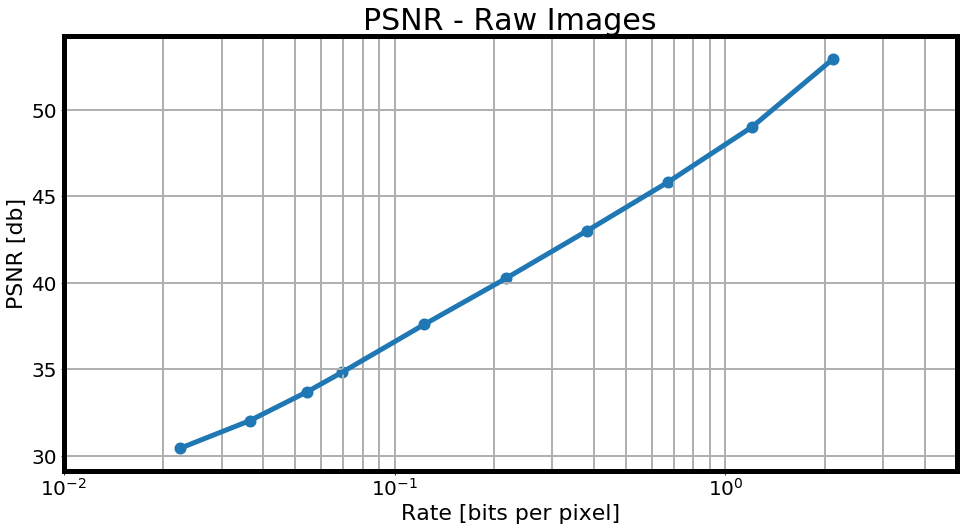

In [14]:
lines_width = 5
axis_width = 5
markes_width = 6
grid_width = 2

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
plt.grid(which='both',linewidth=grid_width)
ax.plot(bpp, avg_psnr_raw, linewidth=lines_width)
ax.scatter(bpp, avg_psnr_raw, label='Raw Images', linewidth=markes_width)
ax.set_xscale('log')
plt.xlabel('Rate [bits per pixel]', fontsize='22')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.ylabel('PSNR [db]', fontsize='22')
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(axis_width)
plt.xlim([10e-3, 5])
#plt.legend(fontsize='25', loc='upper left')
plt.title('PSNR - Raw Images', fontsize='30')

Text(0.5, 1.0, 'PSNR - Subaperture View vs Disparity')

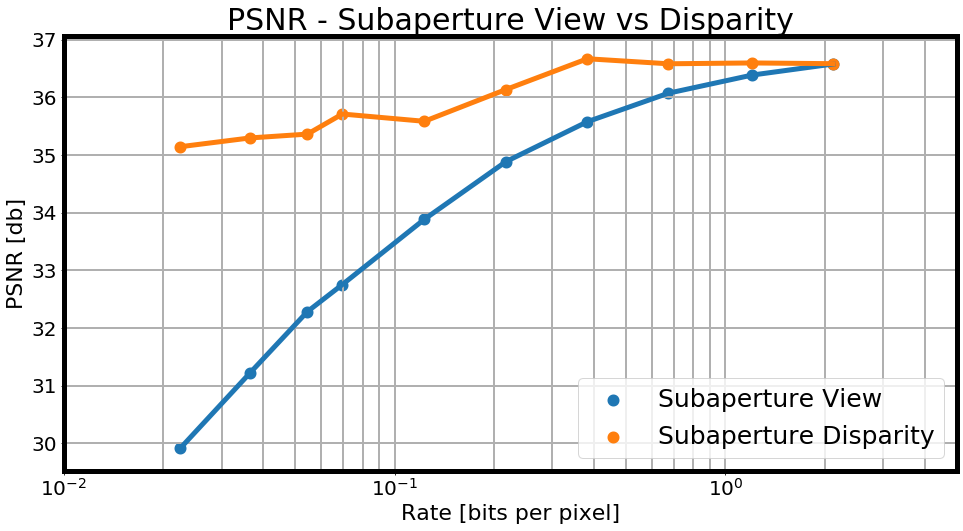

In [23]:
lines_width = 5
axis_width = 5
markes_width = 6
grid_width = 2

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
plt.grid(which='both',linewidth=grid_width)
ax.plot(bpp, avg_psnr_rnd, linewidth=lines_width)
ax.scatter(bpp, avg_psnr_rnd, label='Subaperture View', linewidth=markes_width)
ax.plot(bpp, avg_psnr_rnd_disp + 31.5, linewidth=lines_width)
ax.scatter(bpp, avg_psnr_rnd_disp + 31.5, label='Subaperture Disparity', linewidth=markes_width)
ax.set_xscale('log')
plt.xlabel('Rate [bits per pixel]', fontsize='22')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.ylabel('PSNR [db]', fontsize='22')
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(axis_width)
plt.xlim([10e-3, 5])
plt.legend(fontsize='25', loc='lower right')
plt.title('PSNR - Subaperture View vs Disparity', fontsize='30')

In [30]:
prc_raw = avg_psnr_raw / avg_psnr_raw[0] * 100
prc_disp = avg_psnr_disp / avg_psnr_disp[0] * 100
prc_rnd = avg_psnr_rnd / avg_psnr_rnd[0] * 100
prc_rd = avg_psnr_rnd_disp / avg_psnr_rnd_disp[0] * 100

Text(0.5, 1.0, 'PSNR - Disparity and Rendering')

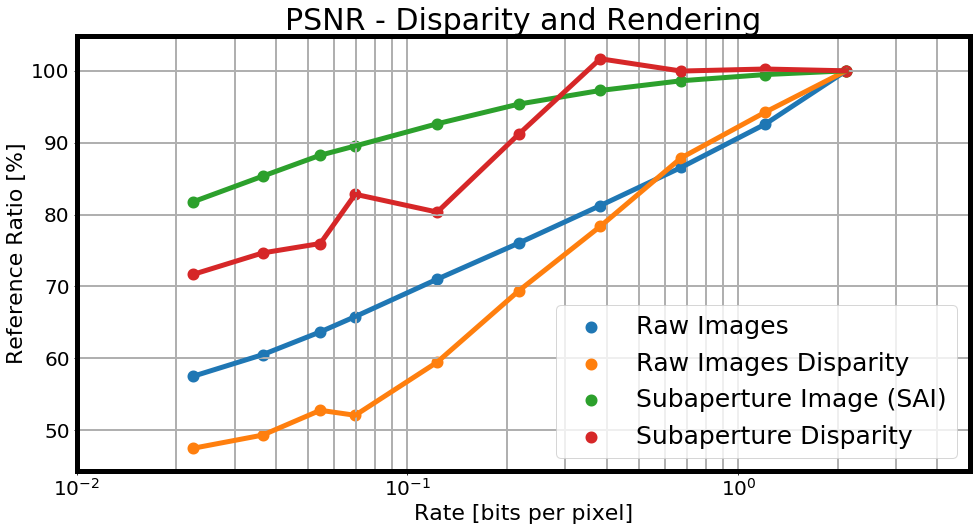

In [35]:
lines_width = 5
axis_width = 5
markes_width = 6
grid_width = 2

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
plt.grid(which='both',linewidth=grid_width)
ax.plot(bpp, prc_raw, linewidth=lines_width)
ax.scatter(bpp, prc_raw, label='Raw Images', linewidth=markes_width)
#ax.plot(bpp, avg_psnr_ml, linewidth=lines_width)
#ax.scatter(bpp, avg_psnr_ml, label='ML Images', linewidth=markes_width)
ax.plot(bpp, prc_disp, linewidth=lines_width)
ax.scatter(bpp, prc_disp, label='Raw Images Disparity', linewidth=markes_width)
ax.plot(bpp, prc_rnd, linewidth=lines_width)
ax.scatter(bpp, prc_rnd, label='Subaperture Image (SAI)', linewidth=markes_width)
ax.plot(bpp, prc_rd, linewidth=lines_width)
ax.scatter(bpp, prc_rd, label='Subaperture Disparity', linewidth=markes_width)
ax.set_xscale('log')
plt.xlabel('Rate [bits per pixel]', fontsize='22')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.ylabel('Reference Ratio [%]', fontsize='22')
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(axis_width)
plt.xlim([10e-3, 5])
plt.legend(fontsize='25', loc='lower right')
plt.title('PSNR - Disparity and Rendering', fontsize='30')